## Dag 3 ochtend

In [1]:
# Alle imports die gebruikt worden
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import researchpy, numpy, pandas
import scipy.stats
from scipy import stats
import math
import statistics
import researchpy as rp
import scipy.stats as stats

Laad data in

In [2]:
data = pd.read_csv("Airlinesatisfaction.csv")

Bekijk data

In [3]:
data.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Unnamed: 0 en id is rare data en kan weggehaald worden.

In [4]:
data = data.drop(columns=["Unnamed: 0","id"])

huidige data nu:

In [5]:
data.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
#Use transpose to invert the data.
columns = ["Flight Distance","Departure Delay in Minutes", "Arrival Delay in Minutes","Age"]
data[columns].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Departure Delay in Minutes,103904.0,14.815618,38.230901,0.0,0.0,0.0,12.0,1592.0
Arrival Delay in Minutes,103594.0,15.178678,38.698682,0.0,0.0,0.0,13.0,1584.0
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0


### Histogrammen

Hier wordt seaborn gebruikt om histogrammen te genereren. Plt laat het zien en defineerd de max van de x as zo nodig.

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age')

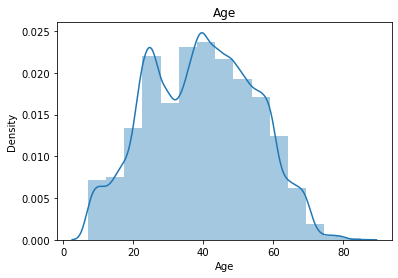

In [7]:
age = data["Age"]
sns.distplot(age, bins = 15)
plt.title('Age')

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Flight Distance')

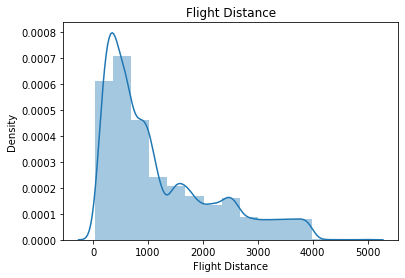

In [8]:
fd = data["Flight Distance"]
sns.distplot(fd, bins = 15)
plt.title("Flight Distance")

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Departure Delay in Minutes')

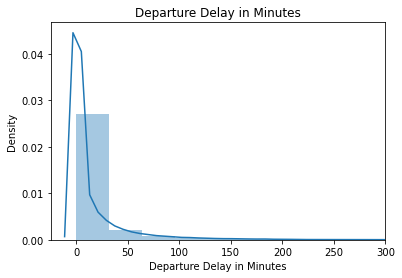

In [9]:
ddim = data["Departure Delay in Minutes"]
sns.distplot(ddim)
plt.xlim(-25,300)
plt.title("Departure Delay in Minutes")

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Arrival Delay in Minutes')

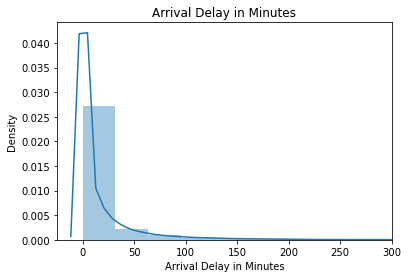

In [10]:
adim = data["Arrival Delay in Minutes"]
sns.distplot(adim)
plt.xlim(-25,300)
plt.title("Arrival Delay in Minutes")

### Check normaal verdeeld met Kolmogorov

de functie kstest wordt gedaan om te testen of waardes normaal verdeeld zijn. Door de grote hoeveelheid data is het moeilijk om een goede p value te krijgen.

In [11]:
stats.kstest(age, "norm")

KstestResult(statistic=0.9999999999987201, pvalue=0.0)

In [12]:
stats.kstest(fd, "norm")

KstestResult(statistic=1.0, pvalue=0.0)

In [13]:
stats.kstest(ddim, "norm")

KstestResult(statistic=0.5, pvalue=0.0)

In [14]:
stats.kstest(adim, "norm")

KstestResult(statistic=nan, pvalue=nan)

### Boxplots

Seaborn wordt weer gebruikt om boxplots te genereren. Dis is een andere manier om handmatig te checken voor normaalverdelingen of verbanden in de data.

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

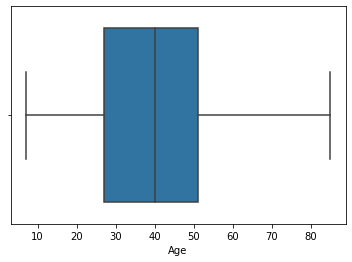

In [15]:
sns.boxplot(age)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Flight Distance'>

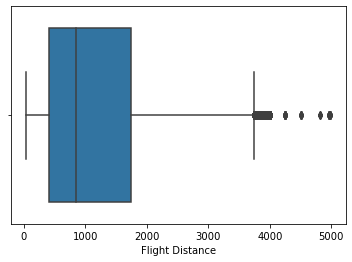

In [16]:
sns.boxplot(fd)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Departure Delay in Minutes'>

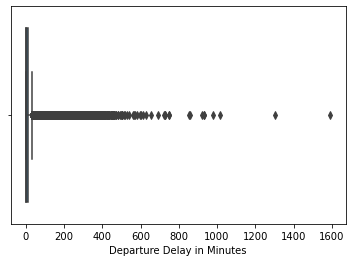

In [17]:
sns.boxplot(ddim)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Arrival Delay in Minutes'>

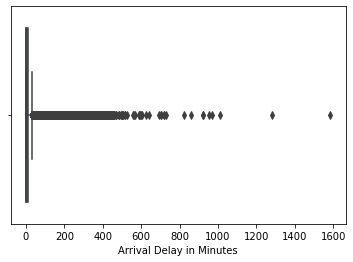

In [18]:
sns.boxplot(adim)